In [12]:
import pandas as pd

# read the CSV file (dataset)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [13]:
# check for missing values
missing_values = df.isnull().sum()

# display the count of missing values for each column
print(missing_values)

age                         0
anaemia                     0
creatinine_phosphokinase    5
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   6
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [14]:
target_column = 'DEATH_EVENT'
columns_to_fill = ['creatinine_phosphokinase', 'platelets']

# separate the dataset into two groups based on the target column
df_1 = df[df[target_column] == 1]
df_0 = df[df[target_column] == 0]

# calculate means for each group
mean_1 = df_1[columns_to_fill].mean()
mean_0 = df_0[columns_to_fill].mean()

# fill missing values based on the group means
df.loc[df[target_column] == 1, columns_to_fill] = df.loc[df[target_column] == 1, columns_to_fill].fillna(mean_1)
df.loc[df[target_column] == 0, columns_to_fill] = df.loc[df[target_column] == 0, columns_to_fill].fillna(mean_0)

# check for missing values after filling
missing_values_after_fill = df.isnull().sum()

# display the count of missing values after filling
print("\nMissing Values After Filling:")
print(missing_values_after_fill)


Missing Values After Filling:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


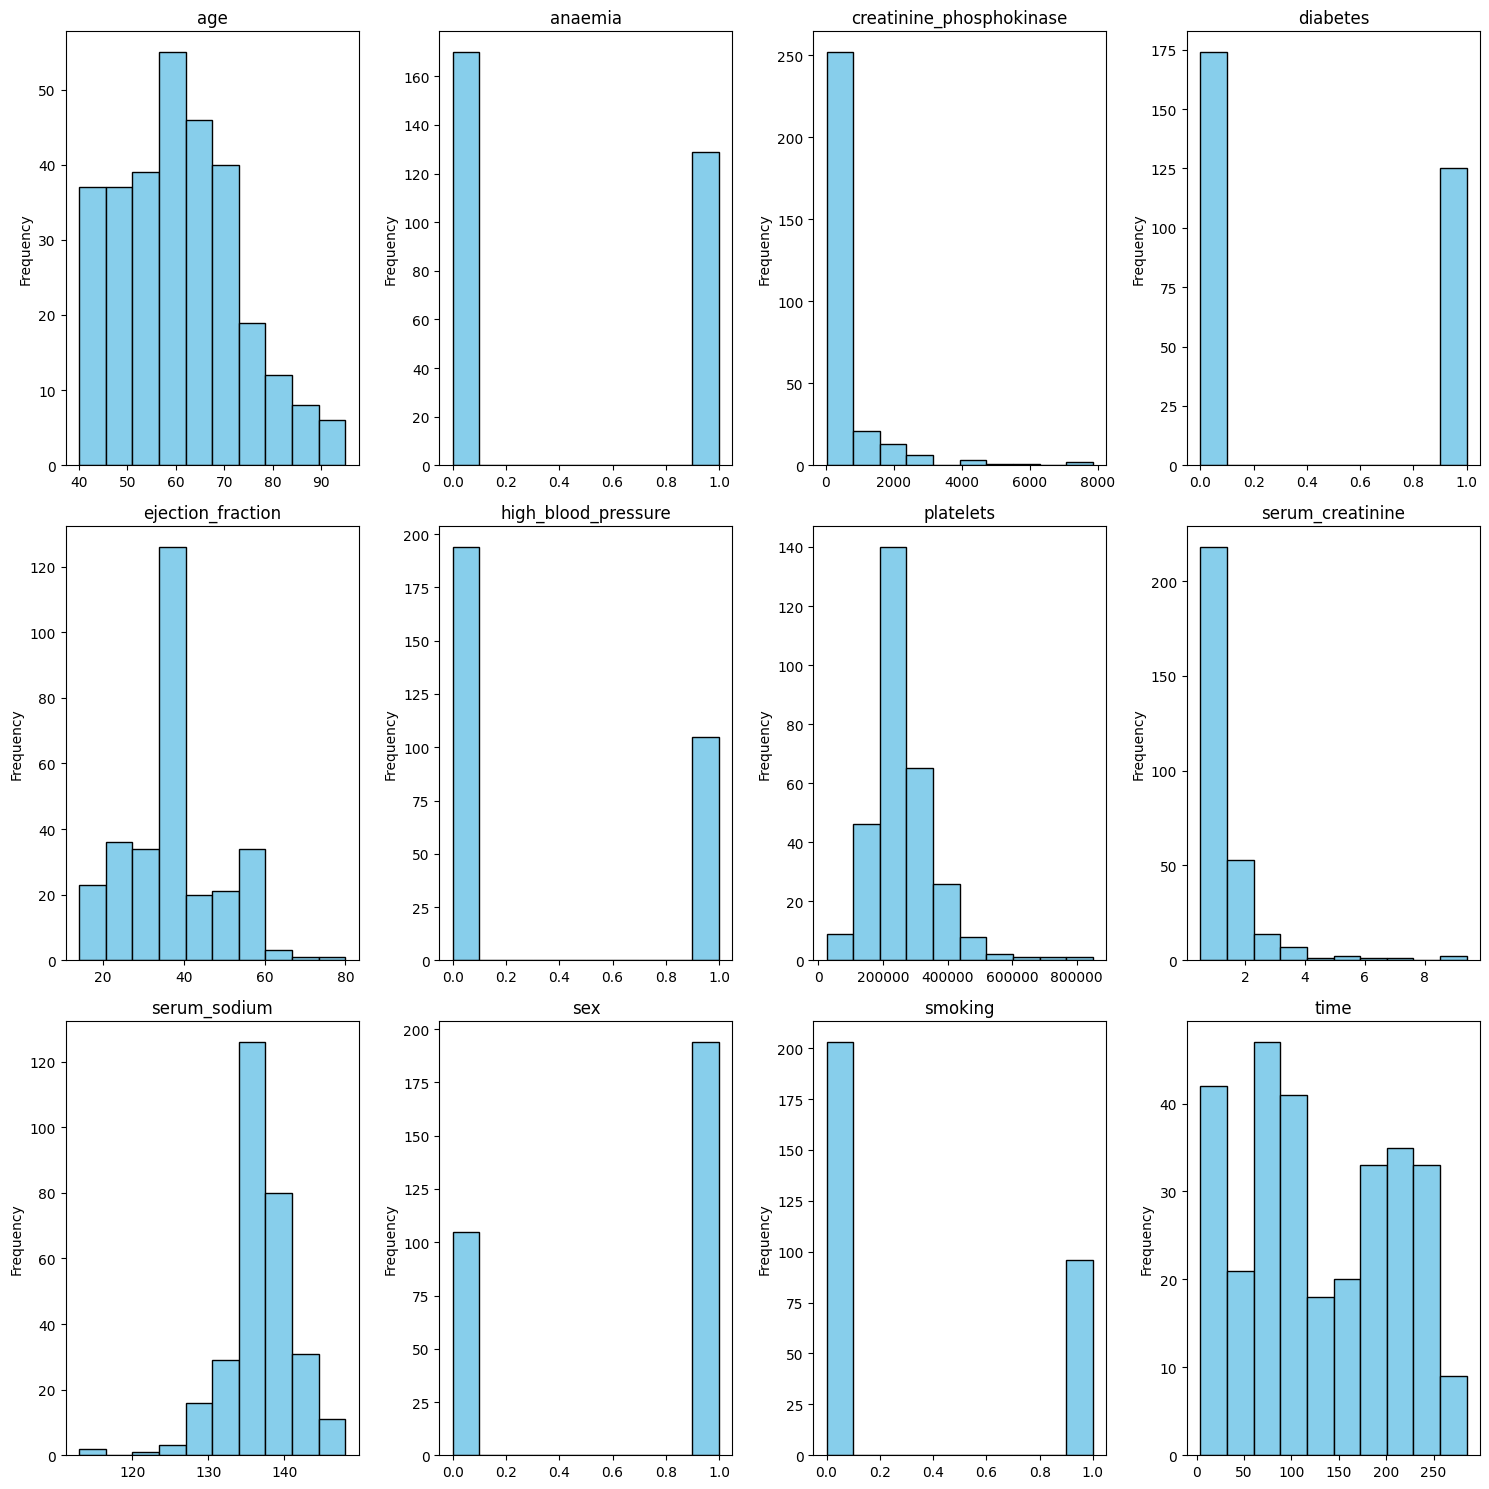

In [15]:
import matplotlib.pyplot as plt

# plot a grid of histograms for each feature
features = df.columns[:-1]  # Exclude the target variable
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    df[feature].plot(kind='hist', ax=axes[row, col], title=feature, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.savefig('histogram.png')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

# normalize numerical attributes using MinMaxScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# display the normalized dataframe
print("\nNormalized DataFrame:")
print(df.head())


Normalized DataFrame:
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364      0.0                  0.071319       0.0           0.090909   
1  0.272727      0.0                  1.000000       0.0           0.363636   
2  0.454545      0.0                  0.015693       0.0           0.090909   
3  0.181818      1.0                  0.011227       0.0           0.090909   
4  0.454545      1.0                  0.017479       1.0           0.090909   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0   0.290823          0.157303      0.485714  1.0   
1                  0.0   0.288833          0.067416      0.657143  1.0   
2                  0.0   0.165960          0.089888      0.457143  1.0   
3                  0.0   0.224148          0.157303      0.685714  1.0   
4                  0.0   0.365984          0.247191      0.085714  0.0   

   smoking      time  DEATH_EVENT  
0      0.0  0.000000 

In [17]:
from scipy import stats
# set the threshold for Z-score
z_threshold = 3

# calculate Z-scores for each numerical column
z_scores = stats.zscore(df[numerical_columns])

# identify and remove rows with outliers
outliers = (abs(z_scores) > z_threshold).any(axis=1)
df_no_outliers = df[~outliers]

# display the dataframe
print("\nDataFrame After Removing Outliers:")
print(df_no_outliers.head())


DataFrame After Removing Outliers:
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364      0.0                  0.071319       0.0           0.090909   
2  0.454545      0.0                  0.015693       0.0           0.090909   
3  0.181818      1.0                  0.011227       0.0           0.090909   
5  0.909091      1.0                  0.003062       0.0           0.393939   
6  0.636364      1.0                  0.028451       0.0           0.015152   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0   0.290823          0.157303      0.485714  1.0   
2                  0.0   0.165960          0.089888      0.457143  1.0   
3                  0.0   0.224148          0.157303      0.685714  1.0   
5                  1.0   0.216875          0.179775      0.542857  1.0   
6                  0.0   0.123530          0.078652      0.685714  1.0   

   smoking      time  DEATH_EVENT  
0      0

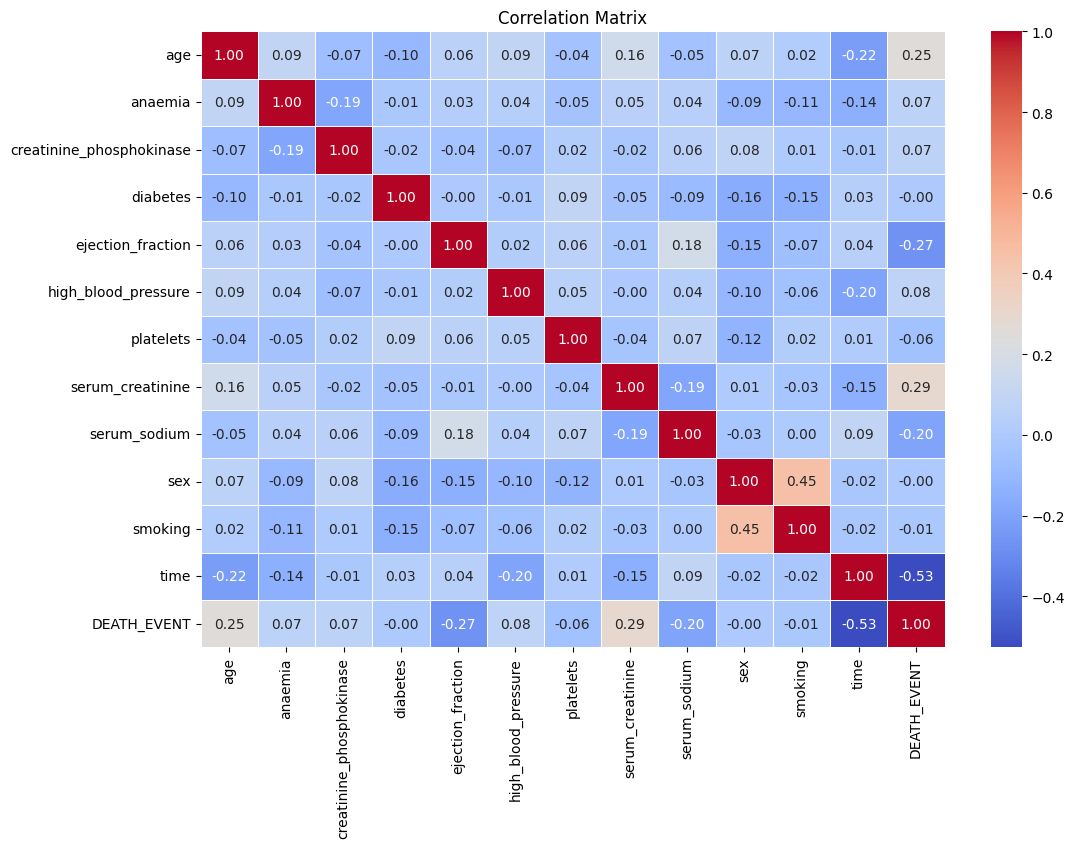

In [18]:
import seaborn as sns

# correlation matrix:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix_plot.png')
plt.show()


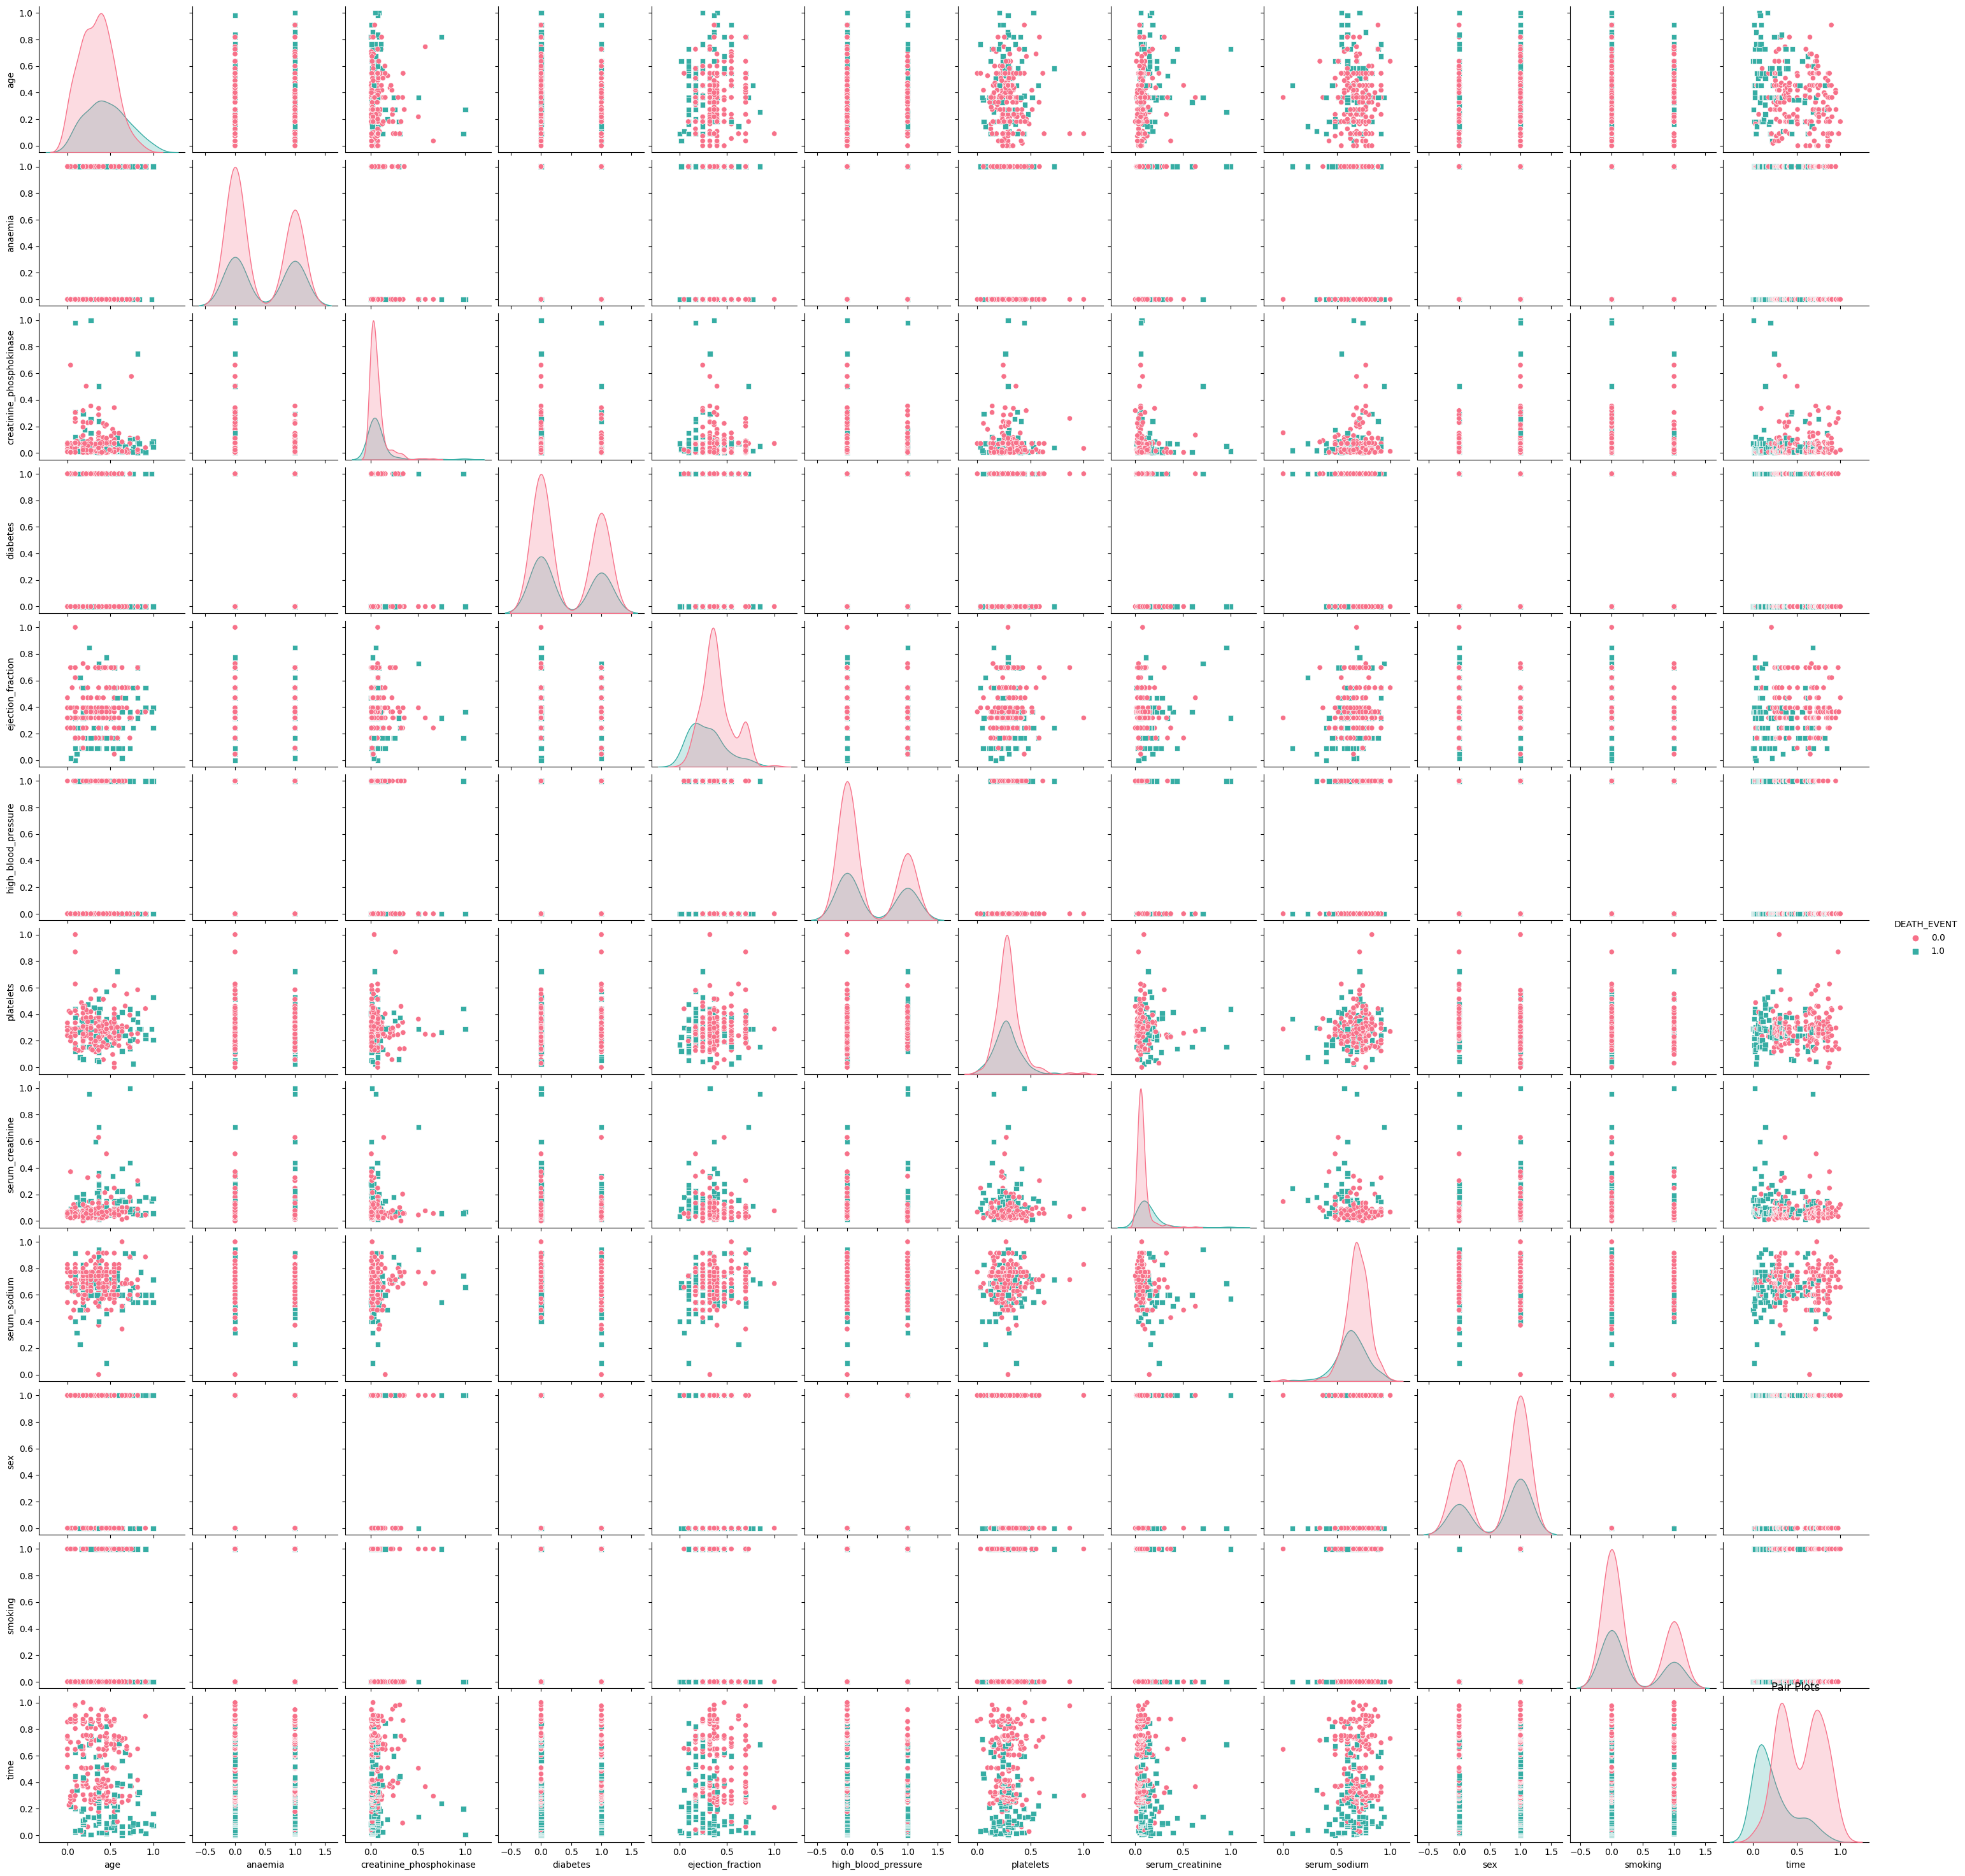

In [19]:
# pair plots:
sns.pairplot(df, hue='DEATH_EVENT', markers=["o", "s"], palette='husl')
plt.title('Pair Plots')
plt.savefig('pair_plot.png')
plt.show()


In [20]:
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

# function to calculate and print confusion matrix
def print_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    accuracy = accuracy_score(y_true, y_pred)

    print(f"\nAccuracy: {accuracy}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nMetrics for Class 0:")
    print(f"Precision: {precision[0]}")
    print(f"Recall: {recall[0]}")
    print(f"F1 Score: {f1[0]}")
    print("\nMetrics for Class 1:")
    print(f"Precision: {precision[1]}")
    print(f"Recall: {recall[1]}")
    print(f"F1 Score: {f1[1]}")

# split the data into features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# num of folds for cross-validation
num_folds = 5

# KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier
    logreg_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = logreg_classifier.predict(X_test)

    # Print confusion matrix
    print_confusion_matrix(y_test, y_pred)

    # Display coefficients
    feature_names = X.columns
    coefficients = pd.Series(logreg_classifier.coef_[0], index=feature_names)
    print("\nCoefficients:")
    print(coefficients)



Accuracy: 0.7166666666666667

Confusion Matrix:
[[34  1]
 [16  9]]

Metrics for Class 0:
Precision: 0.68
Recall: 0.9714285714285714
F1 Score: 0.8

Metrics for Class 1:
Precision: 0.9
Recall: 0.36
F1 Score: 0.5142857142857143

Coefficients:
age                         1.636555
anaemia                    -0.023588
creatinine_phosphokinase    0.363706
diabetes                    0.129695
ejection_fraction          -2.010733
high_blood_pressure        -0.071318
platelets                  -0.362905
serum_creatinine            1.909860
serum_sodium               -0.969151
sex                        -0.415713
smoking                    -0.001722
time                       -3.620674
dtype: float64

Accuracy: 0.8

Confusion Matrix:
[[32  3]
 [ 9 16]]

Metrics for Class 0:
Precision: 0.7804878048780488
Recall: 0.9142857142857143
F1 Score: 0.8421052631578947

Metrics for Class 1:
Precision: 0.8421052631578947
Recall: 0.64
F1 Score: 0.7272727272727272

Coefficients:
age                         0.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# initialize k-neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the classifier
    knn_classifier.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)

    # print confusion matrix
    print_confusion_matrix(y_test, y_pred)


Accuracy: 0.5833333333333334

Confusion Matrix:
[[33  2]
 [23  2]]

Metrics for Class 0:
Precision: 0.5892857142857143
Recall: 0.9428571428571428
F1 Score: 0.7252747252747254

Metrics for Class 1:
Precision: 0.5
Recall: 0.08
F1 Score: 0.13793103448275865

Accuracy: 0.6333333333333333

Confusion Matrix:
[[33  2]
 [20  5]]

Metrics for Class 0:
Precision: 0.6226415094339622
Recall: 0.9428571428571428
F1 Score: 0.7500000000000001

Metrics for Class 1:
Precision: 0.7142857142857143
Recall: 0.2
F1 Score: 0.3125

Accuracy: 0.75

Confusion Matrix:
[[42  4]
 [11  3]]

Metrics for Class 0:
Precision: 0.7924528301886793
Recall: 0.9130434782608695
F1 Score: 0.8484848484848485

Metrics for Class 1:
Precision: 0.42857142857142855
Recall: 0.21428571428571427
F1 Score: 0.2857142857142857

Accuracy: 0.75

Confusion Matrix:
[[42  3]
 [12  3]]

Metrics for Class 0:
Precision: 0.7777777777777778
Recall: 0.9333333333333333
F1 Score: 0.8484848484848485

Metrics for Class 1:
Precision: 0.5
Recall: 0.2
F1 S

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# initialize decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=2)

# perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Assuming you have defined kf

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the classifier
    dt_classifier.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = dt_classifier.predict(X_test)

    # print confusion matrix
    print_confusion_matrix(y_test, y_pred)

    # print feature importances
    print("\nFeature Importances:", dt_classifier.feature_importances_)



Accuracy: 0.6166666666666667

Confusion Matrix:
[[27  8]
 [15 10]]

Metrics for Class 0:
Precision: 0.6428571428571429
Recall: 0.7714285714285715
F1 Score: 0.7012987012987013

Metrics for Class 1:
Precision: 0.5555555555555556
Recall: 0.4
F1 Score: 0.46511627906976744

Feature Importances: [0.06843321 0.         0.06535826 0.02986894 0.04797899 0.
 0.06394815 0.1480188  0.06535342 0.01574327 0.02366261 0.47163435]

Accuracy: 0.8

Confusion Matrix:
[[31  4]
 [ 8 17]]

Metrics for Class 0:
Precision: 0.7948717948717948
Recall: 0.8857142857142857
F1 Score: 0.8378378378378378

Metrics for Class 1:
Precision: 0.8095238095238095
Recall: 0.68
F1 Score: 0.7391304347826089

Feature Importances: [0.01313166 0.01502767 0.07074406 0.         0.15931457 0.
 0.07029665 0.07144448 0.05225471 0.02441169 0.02204058 0.50133394]

Accuracy: 0.8166666666666667

Confusion Matrix:
[[37  9]
 [ 2 12]]

Metrics for Class 0:
Precision: 0.9487179487179487
Recall: 0.8043478260869565
F1 Score: 0.8705882352941177

